## Predict Category of News Using Labeled NYT Data



- Take out the rows that are in category :-  'Gen Soft', 'Misc', 'Week in Review', 'Magazine', 'Home Desk', 'Cars', 'Living', 'Personal Finance'
- Take out the rows that are shorter than 150 characters
- Stratified random sampling 7000 rows for each categories (17 categories)
- Split 80% for trained dataset and 20% for test dataset
- Feature extraction (unigram/bigram/trigram) by take out the n-grams that are occurrence less than 0.05% or greater than 50% of trained dataset
- Fit the model using LinearSVC

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../../nyt_data/nyt_recode_clean.csv.bz2", nrows=10)
select_cols = "categories, OnlineMSoft, NewsDeskSoft, Publication.Date, Publication.Year, Section, Body, Lead.Paragraph, Headline, Online.Headline, Online.Lead.Paragraph, Url, Online.Section, ID"
select_cols = [c.strip() for c in select_cols.split(",")]
for c in select_cols:
    if c not in df.columns:
        print(c)

In [3]:
df = pd.read_csv("../../../nyt_data/nyt_recode_clean.csv.bz2", usecols=select_cols)
df.dropna(subset=["Body"], inplace=True)

/opt/venv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,ID,Body,Headline,Lead.Paragraph,Online.Headline,Online.Lead.Paragraph,Online.Section,Publication.Date,Publication.Year,Section,Url,categories,OnlineMSoft,NewsDeskSoft
0,1,lead 3 compani report 3aar corp nyse qtr nov 3...,AAR CORP reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*AAR CORP (NY...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
1,2,lead 3 compani report 3american cytogenet otc ...,AMERICAN CYTOGENETICS reports earnings for Qtr...,LEAD: *3*** COMPANY REPORTS ** *3*AMERICAN CYT...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
2,3,lead 3 compani report 3appli power otc qtr nov...,APPLIED POWER reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*APPLIED POWE...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
3,4,lead 3 compani report 3barrett resourc otc yea...,BARRETT RESOURCES reports earnings for Year to...,LEAD: *3*** COMPANY REPORTS ** *3*BARRETT RESO...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
4,5,lead 3 compani report 3canaver intern otc year...,CANAVERAL INTERNATIONAL reports earnings for Y...,LEAD: *3*** COMPANY REPORTS ** *3*CANAVERAL IN...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870358,1870359,edit error articl busi day may 2 expans latin ...,Corrections: For the Record,"Because of an editing error, an article in Bus...",NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870359,1870360,articl bloomberg news busi day june 13 fraud t...,Corrections: For the Record,An article by Bloomberg News in Business Day o...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870360,1870361,articl busi day yesterday pari air show missta...,Corrections: For the Record,An article in Business Day yesterday about the...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870361,1870362,music review weekend friday paul mccartney hig...,Corrections: For the Record,A music review in Weekend on Friday about Paul...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False


In [5]:
df.groupby("categories").size()

categories
Arts                111398
Books                33029
Business Finance    344409
Cars                  2581
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Gen Soft             48196
Health                4710
Home Desk             8607
Leisure              44043
Living                6970
Local               347312
Magazine             28141
Misc                 10979
National            145696
Obits                20088
Personal Finance      1045
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
Week in Review       23521
dtype: int64

### Let all other categories ==> Other

In [6]:
df.loc[
    df.categories.isnull()
    | df.categories.isin(
        [
            "Gen Soft",
            "Misc",
            "Week in Review",
            "Magazine",
            "Home Desk",
            "Cars",
            "Living",
            "Personal Finance",
        ]
    ),
    "categories",
] = "Other"

In [7]:
df.groupby("categories").size()

categories
Arts                111398
Books                33029
Business Finance    344409
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Health                4710
Leisure              44043
Local               347312
National            145696
Obits                20088
Other               143886
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
dtype: int64

In [8]:
pd.set_option("max_colwidth", 120)
df[df.Body.str.len() < 150][["Body", "Url"]]

,Body,Url
540,lead better 86 presid reagan ask new year 161 better 86 presid reagan ask new year 161,http://query.nytimes.com/gst/fullpage.html?res=9B0DEFD91738F930A35752C0A961948260
900,lead freshmen athlet elig elig judith dorphley upper montclair nj freshmen athlet elig elig judith dorphley upper mo...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE5DD1E3BF937A35752C0A961948260
1232,lead malici fire arson secretari justic hector rivera cruz puerto rico a16 malici fire arson secretari justic hector...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DC153DF936A35752C0A961948260
1388,lead branch rockefel center christma tree cut tree taken yesterday ap branch rockefel center christma tree cut tree ...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DB123FF935A35752C0A961948260
1486,lead hedi halpert name presid bmt public divis tribuneswabfox compani hedi halpert name presid bmt public divis trib...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DD143EF935A35752C0A961948260
...,...,...
1870191,two thing poverti smuggl ibrahim sawarka life egypt along sinai border a1,http://query.nytimes.com/gst/fullpage.html?res=9502E6D8123FF93AA25755C0A9619C8B63
1870214,broadway reviv eric bogosian talk radio star liev schreiber close sunday 150 perform longacr theater art briefli,http://query.nytimes.com/gst/fullpage.html?res=9E01E5DF133FF93AA25755C0A9619C8B63
1870311,na,http://query.nytimes.com/gst/fullpage.html?res=9C0CE5DE133FF93AA25755C0A9619C8B63
1870360,articl busi day yesterday pari air show misstat boe manufactur schedul 787 plane roll boe plant everett wash juli 8 ...,http://query.nytimes.com/gst/fullpage.html?res=9A01E7DB1530F93AA25755C0A9619C8B63


### Take out the Body text shorter than 150 characters

In [9]:
df = df[df.Body.str.len() > 150]
df.groupby(["categories"]).size()

categories
Arts                109614
Books                32788
Business Finance    336024
Classifieds         107555
Dining                8917
Editorial           131734
Foreign News        125306
Health                4709
Leisure              43740
Local               318471
National            139573
Obits                20086
Other               139631
Real Estate          17786
Science              13822
Sports              173102
Style                33631
Travel               26613
dtype: int64

In [10]:
!pip install nltk

You should consider upgrading via the '/opt/venv37/bin/python -m pip install --upgrade pip' command.


In [11]:
import re
import string
import time

import nltk
import numpy as np
from nltk.stem.porter import PorterStemmer
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

stemmer = PorterStemmer()


def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed


def tokenize_with_punc(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


with open("../../../roberts_rules/all_text.txt") as f:
    text = f.read()
text = re.sub(r"\d+", "", text)

vect = CountVectorizer(tokenizer=tokenize, stop_words="english", ngram_range=(2, 3))
vect.fit([text])
roberts_rules = set(vect.get_feature_names())


def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)


def most_informative_feature_for_class_svm(vectorizer, classifier, n=10):
    labelid = 3  # this is the coef we're interested in.
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray()
    topn = sorted(zip(svm_coef[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(feat, coef)


def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label, " | ".join(feature_names[j] for j in top10)))


def get_top_features(vectorizer, clf, class_labels, n=20):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    top_features = {}
    for i, class_label in enumerate(class_labels):
        topN = np.argsort(clf.coef_[i])[-n:]
        top_features[class_label] = [feature_names[j] for j in topN][::-1]
    return top_features


def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[: -(n + 1) : -1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-20s\t\t%.4f\t%-20s" % (coef_1, fn_1, coef_2, fn_2))


def get_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top_a = coefs_with_fns[:n]
    top_b = coefs_with_fns[: -(n + 1) : -1]
    return top_a, top_b

/opt/venv37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/opt/venv37/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/venv37/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', '

### Stratified Sampling

In [12]:
# SAMPLE_SIZE_PER_CAT = 4000 ==> 0.85
# SAMPLE_SIZE_PER_CAT = 6000 ==> 0.86
SAMPLE_SIZE_PER_CAT = 7000
sdf = pd.DataFrame()
for c in df.categories.unique():
    sdf = sdf.append(
        df[df.categories == c].sample(
            SAMPLE_SIZE_PER_CAT, random_state=21, replace=True
        )
    )

In [13]:
sdf.groupby(["categories"]).size()

categories
Arts                7000
Books               7000
Business Finance    7000
Classifieds         7000
Dining              7000
Editorial           7000
Foreign News        7000
Health              7000
Leisure             7000
Local               7000
National            7000
Obits               7000
Other               7000
Real Estate         7000
Science             7000
Sports              7000
Style               7000
Travel              7000
dtype: int64

In [18]:
sdf["soft_news"] = 0

In [19]:
sdf.loc[
    sdf.categories.isin(
        [
            "Arts",
            "Books",
            "Classifieds",
            "Dining",
            "Leisure",
            "Obits",
            "Other",
            "Real Estate",
            "Style",
            "Travel",
        ]
    ),
    "soft_news",
] = 1
sdf

,ID,Body,Headline,Lead.Paragraph,Online.Headline,Online.Lead.Paragraph,Online.Section,Publication.Date,Publication.Year,Section,Url,categories,OnlineMSoft,NewsDeskSoft,soft_news
252556,252557,lead arvin industri columbu ind autopart compani said plan sell arvinair divis make portabl heater evapor cooler ass...,BRIEFS,"LEAD: * Arvin Industries, Columbus, Ind., an auto-parts company, said it plans to sell its Arvinair division, which ...",NaN,NaN,Business,19890406T000000,1989.0,D,http://query.nytimes.com/gst/fullpage.html?res=950DE2D81131F935A35757C0A96F948260,Business Finance,0,False,0
1841266,1841267,seven year count seven year martin armstrong onetim globetrot invest manag metropolitan correct center lower manhatt...,TODAY IN BUSINESS,"SEVEN YEARS AND COUNTING -- For seven years, Martin A. Armstrong, a onetime globe-trotting investment manager, has b...",NaN,NaN,Business,20070216T000000,2007.0,C,http://query.nytimes.com/gst/fullpage.html?res=9904E1DF143EF935A25751C0A9619C8B63,Business Finance,0,False,0
728131,728132,percent previou year yesterday day ago prime rate 775 775 600 discount rate 400 400 300 feder fund 469 471 323 3mo t...,Key Rates,In percent Previous Year Yesterday Day Ago PRIME RATE 7.75 7.75 6.00 DISCOUNT RATE 4.00 4.00 3.00 FEDERAL FUNDS* 4.6...,NaN,NaN,Business,19940921T000000,1994.0,D,http://query.nytimes.com/gst/fullpage.html?res=9E01E7DB163AF932A1575AC0A962958260,Business Finance,0,False,0
446482,446483,sinc end war iraq american busi worker rush tri grab piec multibilliondollar job rebuild kuwait despit thousand hour...,Kuwait Not Yet Open for Business,"Since the end of the war against Iraq, American businesses and workers have rushed to try to grab a piece of the mul...",NaN,NaN,Business,19910322T000000,1991.0,D,http://query.nytimes.com/gst/fullpage.html?res=9D0CE4DC153BF931A15750C0A967958260,Business Finance,0,False,0
256269,256270,lead canadian investor group includ conrad black own daili telegraph britain made surpris 20 million offer buy jerus...,10 Offers for Jerusalem Post,"LEAD: A Canadian investor group that includes Conrad Black, who owns The Daily Telegraph in Britain, made a surprise...",NaN,NaN,Business,19890419T000000,1989.0,D,http://query.nytimes.com/gst/fullpage.html?res=950DEEDB153BF93AA25757C0A96F948260,Business Finance,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816021,1816022,know roast chicken unquestion valuabl skill roast veget combin littl practic result dish crisp nice brown bird tende...,Twofers In the Roaster,"KNOWING how to roast a chicken is unquestionably a valuable skill, and so is roasting vegetables. So why not combine...",NaN,NaN,Arts; Dining and Wine,20061101T000000,2006.0,F,http://query.nytimes.com/gst/fullpage.html?res=9B02E3D7123FF932A35752C1A9609C8B63,Dining,2,True,1
1357437,1357438,would hardli expect california canni winemak ignor grape turn worldclass wine spain franc yet grenach key compon ble...,An Agile Partner,YOU would hardly expect California's canny winemakers to ignore a grape that is turned into world-class wines in Spa...,An Agile Partner,"A few hearty souls have been making good grenache wines, both as blends and as single varietals, in several styles.",Dining and Wine; Style,20011114T000000,2001.0,F,http://query.nytimes.com/gst/fullpage.html?res=9B0CE6DD1138F937A25752C1A9679C8B63,Dining,2,True,1
1278196,1278197,editor mother make excel mash potato mother hous like enjoy eat experi food find local market tast talent chef use i...,What Eating Out Is For,"To the Editor: My mother makes excellent mashed potatoes, and it is at my mother's house that I like to enjoy them. ...",NaN,NaN,Dining and Wine; Style; Opinion,20010117T000000,2001.0,F,http://query.nytimes.com/gst/fullpage.html?res=9B01EEDA113DF934A25752C0A9679C8B63,Dining,2,True,1
1563391,1563392,vegan guid new york citi rynn berri chri abreusuzuki ethic live 995 vegan eat anim product borough borough book list...,"More Than a Food Guide, A Portable Conscience","''The Veg

In [20]:
sdf[["ID", "Body", "soft_news"]].to_csv("nyt_sample_soft_news_7k.csv", index=False)

X = sdf.Body
y = sdf.categories

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [26]:
X = sdf[["ID", "Body"]]
y = sdf.soft_news

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [27]:
X_test_data = X_test.copy()
X_train = X_train.Body
X_test = X_test.Body

In [28]:
import re


def custom_tokenizer(doc):
    doc = re.sub(r"\d+", "[NUM]", doc)
    return doc.split()

In [29]:
vect = CountVectorizer(
    ngram_range=(1, 3),
    min_df=0.0005,
    max_df=0.5,
    tokenizer=custom_tokenizer,
    max_features=20000,
)
# vect = CountVectorizer(ngram_range=(1, 3), min_df=10, max_df=0.3, tokenizer=custom_tokenizer, max_features=10000)
# vect = CountVectorizer(ngram_range=(1, 3), min_df=200, max_df=0.3, tokenizer=custom_tokenizer)

In [30]:
%%time
X_train = vect.fit_transform(X_train)
transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)

CPU times: user 7min 58s, sys: 22.3 s, total: 8min 21s
Wall time: 8min 20s


In [31]:
len(vect.vocabulary_)

20000

In [32]:
%%time
X_test = vect.transform(X_test)
transformer = TfidfTransformer()
X_test = transformer.fit_transform(X_test)

CPU times: user 33.7 s, sys: 100 ms, total: 33.8 s
Wall time: 33.9 s


In [33]:
len(vect.vocabulary_)

20000

In [34]:
%%time
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

est = LinearSVC(penalty="l1", dual=False, tol=1e-3)

# Calibrated with isotonic calibration
clf = CalibratedClassifierCV(est, cv=2, method="isotonic")

t0 = time.time()
clf.fit(X_train, y_train)
t1 = time.time()
y_pred = clf.predict(X_test)
t2 = time.time()
time_clf_train = t1 - t0
time_clf_predict = t2 - t1
print("Results for classifier")
print("Training time: %fs; Prediction time: %fs" % (time_clf_train, time_clf_predict))
print(classification_report(y_test, y_pred))

Results for classifier
Training time: 37.251120s; Prediction time: 0.041601s
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11200
           1       0.93      0.93      0.93     14000

    accuracy                           0.93     25200
   macro avg       0.93      0.93      0.93     25200
weighted avg       0.93      0.93      0.93     25200

CPU times: user 37 s, sys: 348 ms, total: 37.3 s
Wall time: 37.4 s


In [35]:
f1_score(y_test, y_pred, average="macro")

0.9260279447276004

In [36]:
len(vect.vocabulary_)

20000

In [40]:
clf.classes_

array([0, 1])

In [48]:
show_most_informative_features(vect, clf.calibrated_classifiers_[0].base_estimator)

	-12.7214	[NUM] [NUM] writer  		25.6921	pp                  
	-12.0607	ope                 		25.5087	[NUM] pp            
	-11.7837	media busi          		19.8494	travel advisori     
	-9.8721	person health       		10.2725	die yesterday       
	-9.4528	vital sign          		8.9983	practic travel      
	-9.3555	nyt                 		6.5927	food stuff          
	-7.7166	york ny [NUM]       		6.2205	year old            
	-7.3147	person comput       		5.7203	bridegroom          
	-6.5023	news articl         		5.5904	paper [NUM]         
	-6.2427	total time [NUM]    		5.1511	eat well            
	-6.1803	sport peopl         		5.0528	marri yesterday     
	-6.1427	total time          		4.8360	nadin               
	-5.9727	compani news        		4.7183	year old mr         
	-5.9054	scienc time         		4.6805	yesterday home      
	-5.3314	review [NUM]        		4.4876	[NUM] sunday        
	-5.2026	scienc watch        		4.2180	illustr [NUM]       
	-5.0692	c claiborn          		4.1920	citi colleg

In [49]:
get_most_informative_features(vect, clf.calibrated_classifiers_[0].base_estimator)

([(-12.721442524838018, '[NUM] [NUM] writer'),
  (-12.060667734003372, 'ope'),
  (-11.783722077061537, 'media busi'),
  (-9.87212179451187, 'person health'),
  (-9.452774932525934, 'vital sign'),
  (-9.355472568440717, 'nyt'),
  (-7.716557143903232, 'york ny [NUM]'),
  (-7.314698258093638, 'person comput'),
  (-6.502253549572486, 'news articl'),
  (-6.242662050965985, 'total time [NUM]'),
  (-6.180338413558473, 'sport peopl'),
  (-6.1426899598577025, 'total time'),
  (-5.972685751555178, 'compani news'),
  (-5.9054449138332625, 'scienc time'),
  (-5.331425525462479, 'review [NUM]'),
  (-5.202646505833702, 'scienc watch'),
  (-5.069201615436941, 'c claiborn'),
  (-5.045900904361473, 'today'),
  (-5.004715955255934, 'editor re'),
  (-4.804276346895488, 'aug [NUM] [NUM]')],
 [(25.69208991512059, 'pp'),
  (25.508651264591496, '[NUM] pp'),
  (19.849418092549808, 'travel advisori'),
  (10.272528795659094, 'die yesterday'),
  (8.998267562481582, 'practic travel'),
  (6.592661700982284, 'food 

In [51]:
vect.stop_words_ = None

In [52]:
%%time
joblib.dump(vect, "../data/us_model/nyt_us_soft_news_vectorizer.joblib", compress=3)
joblib.dump(clf, "../data/us_model/nyt_us_soft_news_classifier.joblib", compress=3)

CPU times: user 1.57 s, sys: 0 ns, total: 1.57 s
Wall time: 1.57 s


['../data/us_model/nyt_us_soft_news_classifier.joblib']

In [53]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ["true_value"]
y_test_df.reset_index(drop=True, inplace=True)

y_test_df["pred_value"] = clf.predict(X_test)

if hasattr(clf, "predict_proba"):
    prob = clf.predict_proba(X_test)
else:  # use decision function
    prob = clf.decision_function(X_test)
    prob = (prob - prob.min()) / (prob.max() - prob.min())
prob_df = pd.DataFrame(prob)
columns = []
for c in clf.classes_:
    columns.append(c)
prob_df.columns = columns
result_df = pd.concat([X_test_data.reset_index(drop=True), y_test_df, prob_df], axis=1)
result_df.to_csv(
    "./tests/us_soft_news_test_prediction_other_calibrated+text.csv", index=False
)
result_df

,ID,Body,true_value,pred_value,0,1
0,1275388,africa blood autobiographi letter earli year jane goodal edit dale peterson houghton mifflin 28 foul revolt specimen...,1,1,0.037465,0.962535
1,1850994,last year one eye commun anoth academi third eye medit squar poster high museum art atlanta made big splash open two...,1,1,0.011201,0.988799
2,119490,lead editor editor review book condemn repetit unit state nicaragua nov 8 susan kaufman purcel write suggest first p...,1,1,0.154482,0.845518
3,1755050,dough nicol klagsbrun galleri 526 west 26th street chelsea feb 25 new york galleri debut third major piec seen new y...,1,1,0.013752,0.986248
4,823519,5 sign atop moni build said 35 degre 6 34 degre 8 board bu midtown hotel snow 26th new york citi marathon threaten b...,0,0,0.744453,0.255547
...,...,...,...,...,...,...
25195,744822,feder hill section provid ri like littl itali insid littl itali lot convers start like noth open act like tini hit u...,1,1,0.011201,0.988799
25196,1303169,editor say hey kid bob herbert april 23 column willi may brought back wonder memori sit grandstand behind first base...,0,1,0.413963,0.586037
25197,49210,lead close week end may 30 manhattan east midtown 195000 420 east 55th street sutton garden 1bedroom 1bath 850sqft p...,1,1,0.006677,0.993323
25198,1638179,presidenti elect hang outcom vote eight swing state re approach america quadrenni obsess elector colleg new yorker o...,0,0,0.847579,0.152421


In [54]:
result_df[result_df.pred_value != result_df.true_value].to_csv(
    "./reports/nyt_soft_news_test_pred_misclass.csv", index=False
)

In [55]:
%matplotlib inline
from pandas_confusion import ConfusionMatrix

y_true = y_test.reset_index(drop=True)
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted      0      1  __all__
Actual                          
0          10277    923    11200
1            918  13082    14000
__all__    11195  14005    25200


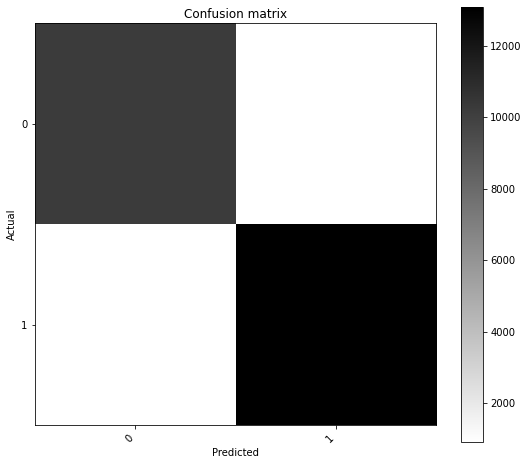

In [56]:
confusion_matrix.plot()

In [57]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_true, y_pred)
conf_df = pd.DataFrame(conf)
conf_df.columns = clf.classes_
conf_df.index = clf.classes_
conf_df.to_csv(
    "./reports/us_soft_news_test_confusion_matrix_other_calibrated.csv",
    index_label=r"actual \ predicted",
)
print(conf_df)

       0      1
0  10277    923
1    918  13082
